In [5]:
import sys
!{sys.executable} -m pip install sentinelhub

  Using cached https://files.pythonhosted.org/packages/e2/11/ac1b48901b876174fc5ff953a77fb86ab1a2ecf3e58d8f61e1c612177814/sentinelhub-3.0.5.tar.gz
     |████████████████████████████████| 153kB 1.5MB/s eta 0:00:01
  Using cached https://files.pythonhosted.org/packages/1c/4e/ac9743c467cd1cb3178428e9f548f5d2b41ca54df28db694f108baf549be/utm-0.6.0.tar.gz
  Using cached https://files.pythonhosted.org/packages/05/57/ce2e7a8fa7c0afb54a0581b14a65b56e62b5759dbc98e80627142b8a3704/oauthlib-3.1.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/a3/12/b92740d845ab62ea4edf04d2f4164d82532b5a0b03836d4d4e71c6f3d379/requests_oauthlib-1.3.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/5b/58/1007ed4a287c6dd3dc953ae478145bab28e8abc529627b2ee797f84b201e/aenum-2.2.4-py3-none-any.whl
  Stored in directory: /Users/natashalove/Library/Caches/pip/wheels/26/7a/9b/05e508fb080ef7e27da59f68e3cceb895807df3788bc07a88a
  Stored in directory: /Users/natashalove/Li

In [7]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import itertools

import numpy as np
from shapely.geometry import shape, Polygon, MultiPolygon, MultiLineString

from sentinelhub import BBoxSplitter, OsmSplitter, TileSplitter, CustomGridSplitter, UtmZoneSplitter, UtmGridSplitter
from sentinelhub import BBox, read_data, CRS, DataSource

In [20]:
!{sys.executable} -m pip install cartopy

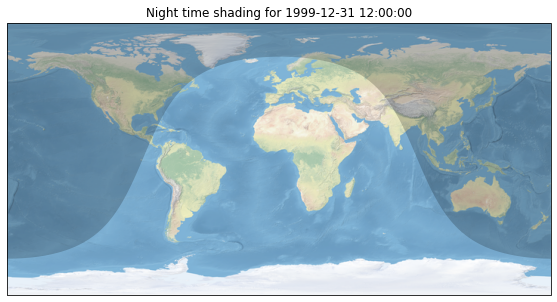

In [22]:
import datetime
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.feature.nightshade import Nightshade


fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

date = datetime.datetime(1999, 12, 31, 12)

ax.set_title('Night time shading for {}'.format(date))
ax.stock_img()
ax.add_feature(Nightshade(date, alpha=0.2))
plt.show()


/Users/natashalove/.conda/envs/poly/lib/python3.7/site-packages/cartopy/io/__init__.py:260: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/110m/physical/ne_110m_land.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)
/Users/natashalove/.conda/envs/poly/lib/python3.7/site-packages/cartopy/io/__init__.py:260: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/110m/physical/ne_110m_ocean.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)
/Users/natashalove/.conda/envs/poly/lib/python3.7/site-packages/cartopy/io/__init__.py:260: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/110m/cultural/ne_110m_admin_0_boundary_lines_land.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)
/Users/natashalove/.conda/envs/poly/lib/python3.7/site-packages/cartopy/io/__init__.py:260: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/110m/physical/ne_110m_lakes.zip
  warnings.warn('Downloading: {}'.f

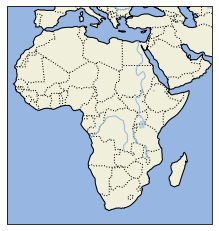

In [24]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt


def main():
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
    ax.set_extent([-20, 60, -40, 45], crs=ccrs.PlateCarree())

    ax.add_feature(cfeature.LAND)
    ax.add_feature(cfeature.OCEAN)
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    ax.add_feature(cfeature.LAKES, alpha=0.5)
    ax.add_feature(cfeature.RIVERS)

    plt.show()


if __name__ == '__main__':
    main()

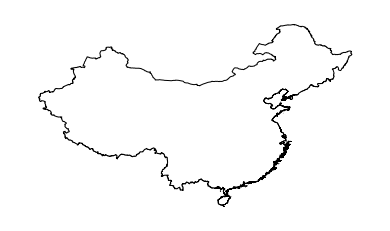

In [3]:
import geoplot
import geopandas as gpd
import pandas as pd
from geopandas import GeoDataFrame
from shapely.geometry import Polygon

chn0 = "zip:///Users/natashalove/Downloads/CHN_adm/chn0.zip"
chn = gpd.read_file(chn0)

geoplot.polyplot(chn, figsize=(8, 4))

In [5]:
type(chn)

geopandas.geodataframe.GeoDataFrame

In [75]:
from shapely.geometry import Polygon
polygon = Polygon([(73.48, 18.35), (73.48, 53.59), (134.63, 53.59), (134.63, 18.35)])
#polygon.area
#polygon.length
polygon.bounds

(73.48, 18.35, 134.63, 53.59)

In [76]:
type(polygon)

shapely.geometry.polygon.Polygon

In [49]:
bbox_splitter = BBoxSplitter([polygon], CRS.WGS84, (5, 4))  # bounding box will be split into grid of 5x4 bounding boxes

print('Area bounding box: {}\n'.format(bbox_splitter.get_area_bbox().__repr__()))

bbox_list = bbox_splitter.get_bbox_list()
info_list = bbox_splitter.get_info_list()

print('Each bounding box also has some info how it was created.\nExample:\n'
      'bbox: {}\ninfo: {}\n'.format(bbox_list[0].__repr__(), info_list[0]))

Area bounding box: BBox(((73.48, 18.35), (134.63, 53.59)), crs=CRS('4326'))

Each bounding box also has some info how it was created.
Example:
bbox: BBox(((73.48, 18.35), (85.71000000000001, 27.160000000000004)), crs=CRS('4326'))
info: {'parent_bbox': BBox(((73.48, 18.35), (134.63, 53.59)), crs=CRS('4326')), 'index_x': 0, 'index_y': 0}



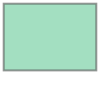

In [50]:
geometry_list = bbox_splitter.get_geometry_list()
geometry_list[0]

In [2]:
from sentinelhub import SHConfig

# In case you put the credentials into the configuration file you can leave this unchanged

CLIENT_ID = 'ccaaa159-14e8-4703-a192-5008c7d572cb'
CLIENT_SECRET = 'av$bp__@q-lRMlNDr1~2H(npzP6R|fbu4l[OB[Gf'

In [3]:
config = SHConfig()

if CLIENT_ID and CLIENT_SECRET:
    config.sh_client_id = CLIENT_ID
    config.sh_client_secret = CLIENT_SECRET

if config.sh_client_id == '' or config.sh_client_secret == '':
    print("Warning! To use Sentinel Hub services, please provide the credentials (client ID and client secret).")


In [20]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import os
import datetime
import numpy as np
import matplotlib.pyplot as plt
from plotly import utils

from sentinelhub import MimeType, CRS, BBox, SentinelHubRequest, SentinelHubDownloadClient, DataSource, bbox_to_dimensions, DownloadRequest


In [29]:
import sys
!{sys.executable} -m pip install mxnet
"""Visualize image."""
import numpy as np
import mxnet as mx

def plot_image(img, ax=None, reverse_rgb=False):
    """Visualize image.

    Parameters
    ----------
    img : numpy.ndarray or mxnet.nd.NDArray
        Image with shape `H, W, 3`.
    ax : matplotlib axes, optional
        You can reuse previous axes if provided.
    reverse_rgb : bool, optional
        Reverse RGB<->BGR orders if `True`.

    Returns
    -------
    matplotlib axes
        The ploted axes.

    Examples
    --------

    from matplotlib import pyplot as plt
    ax = plot_image(img)
    plt.show()
    """
    from matplotlib import pyplot as plt
    if ax is None:
        # create new axes
        fig = plt.figure()
        ax = fig.add_subplot(1, 1, 1)
    if isinstance(img, mx.nd.NDArray):
        img = img.asnumpy()
    img = img.copy()
    if reverse_rgb:
        img[:, :, (0, 1, 2)] = img[:, :, (2, 1, 0)]
    ax.imshow(img.astype(np.uint8))
    return ax

SyntaxError: non-default argument follows default argument (<ipython-input-29-da7674c1bcf1>, line 7)

In [5]:
betsiboka_coords_wgs84 = [46.16, -16.15, 46.51, -15.58]
resolution = 60
betsiboka_bbox = BBox(bbox=betsiboka_coords_wgs84, crs=CRS.WGS84)
betsiboka_size = bbox_to_dimensions(betsiboka_bbox, resolution=resolution)

print(f'Image shape at {resolution} m resolution: {betsiboka_size} pixels')


Image shape at 60 m resolution: (631, 1047) pixels


In [6]:
evalscript_true_color = """
    //VERSION=3

    function setup() {
        return {
            input: [{
                bands: ["B02", "B03", "B04"]
            }],
            output: {
                bands: 3
            }
        };
    }

    function evaluatePixel(sample) {
        return [sample.B04, sample.B03, sample.B02];
    }
"""

request_true_color = SentinelHubRequest(
    evalscript=evalscript_true_color,
    input_data=[
        SentinelHubRequest.input_data(
            data_source=DataSource.SENTINEL2_L1C,
            time_interval=('2020-06-12', '2020-06-13'),
        )
    ],
    responses=[
        SentinelHubRequest.output_response('default', MimeType.PNG)
    ],
    bbox=betsiboka_bbox,
    size=betsiboka_size,
    config=config
)

In [7]:
true_color_imgs = request_true_color.get_data()

In [8]:
print(f'Returned data is of type = {type(true_color_imgs)} and length {len(true_color_imgs)}.')
print(f'Single element in the list is of type {type(true_color_imgs[-1])} and has shape {true_color_imgs[-1].shape}')

Returned data is of type = <class 'list'> and length 1.
Single element in the list is of type <class 'numpy.ndarray'> and has shape (1047, 631, 3)


Image type: uint8


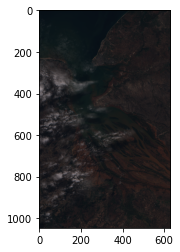

In [33]:
image = true_color_imgs[0]
print(f'Image type: {image.dtype}')

# plot function
# factor 1/255 to scale between 0-1
# factor 3.5 to increase brightness
plot_image(image)


In [34]:
evalscript_clm = """
//VERSION=3
function setup() {
  return {
    input: ["B02", "B03", "B04", "CLM"],
    output: { bands: 3 }
  }
}

function evaluatePixel(sample) {
  if (sample.CLM == 1) {
    return [0.75 + sample.B04, sample.B03, sample.B02]
  }
  return [3.5*sample.B04, 3.5*sample.B03, 3.5*sample.B02];
}
"""

request_true_color = SentinelHubRequest(
    evalscript=evalscript_clm,
    input_data=[
        SentinelHubRequest.input_data(
            data_source=DataSource.SENTINEL2_L1C,
            time_interval=('2020-06-12', '2020-06-13'),
        )
    ],
    responses=[
        SentinelHubRequest.output_response('default', MimeType.PNG)
    ],
    bbox=betsiboka_bbox,
    size=betsiboka_size,
    config=config
)


In [35]:
data_with_cloud_mask = request_true_color.get_data()

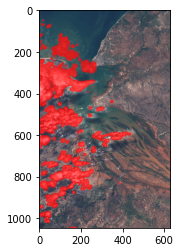

In [36]:
plot_image(data_with_cloud_mask[0])

In [37]:
request_true_color = SentinelHubRequest(
    evalscript=evalscript_true_color,
    input_data=[
        SentinelHubRequest.input_data(
            data_source=DataSource.SENTINEL2_L1C,
            time_interval=('2020-06-01', '2020-06-30'),
            mosaicking_order='leastCC'
        )
    ],
    responses=[
        SentinelHubRequest.output_response('default', MimeType.PNG)
    ],
    bbox=betsiboka_bbox,
    size=betsiboka_size,
    config=config
)

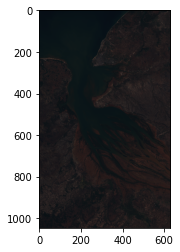

In [40]:
plot_image(request_true_color.get_data()[0])

In [41]:
evalscript_all_bands = """
    //VERSION=3
    function setup() {
        return {
            input: [{
                bands: ["B01","B02","B03","B04","B05","B06","B07","B08","B8A","B09","B10","B11","B12"],
                units: "DN"
            }],
            output: {
                bands: 13,
                sampleType: "INT16"
            }
        };
    }

    function evaluatePixel(sample) {
        return [sample.B01,
                sample.B02,
                sample.B03,
                sample.B04,
                sample.B05,
                sample.B06,
                sample.B07,
                sample.B08,
                sample.B8A,
                sample.B09,
                sample.B10,
                sample.B11,
                sample.B12];
    }
"""

request_all_bands = SentinelHubRequest(
    evalscript=evalscript_all_bands,
    input_data=[
        SentinelHubRequest.input_data(
            data_source=DataSource.SENTINEL2_L1C,
            time_interval=('2020-06-01', '2020-06-30'),
            mosaicking_order='leastCC'
    )],
    responses=[
        SentinelHubRequest.output_response('default', MimeType.TIFF)
    ],
    bbox=betsiboka_bbox,
    size=betsiboka_size,
    config=config
)

In [42]:
all_bands_response = request_all_bands.get_data()

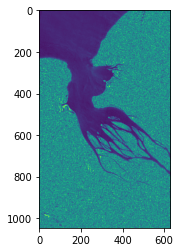

In [43]:
# Image showing the SWIR band B12
# Factor 1/1e4 due to the DN band values in the range 0-10000
# Factor 3.5 to increase the brightness
plot_image(all_bands_response[0][:, :, 12])

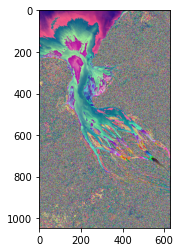

In [44]:
# From raw bands we can also construct a False-Color image
# False color image is (B03, B04, B08)
plot_image(all_bands_response[0][:, :, [2,3,7]])

In [45]:
request_all_bands = SentinelHubRequest(
    data_folder='/Users/natashalove/Downloads/CHN_adm',
    evalscript=evalscript_all_bands,
    input_data=[
        SentinelHubRequest.input_data(
            data_source=DataSource.SENTINEL2_L1C,
            time_interval=('2020-06-01', '2020-06-30'),
            mosaicking_order='leastCC'
    )],
    responses=[
        SentinelHubRequest.output_response('default', MimeType.TIFF)
    ],
    bbox=betsiboka_bbox,
    size=betsiboka_size,
    config=config
)

In [46]:
%%time
all_bands_img = request_all_bands.get_data(save_data=True)

CPU times: user 250 ms, sys: 74.7 ms, total: 324 ms
Wall time: 8.19 s


In [47]:
print(f'The output directory has been created and a tiff file with all 13 bands was saved into ' \
      'the following structure:\n')

for folder, _, filenames in os.walk(request_all_bands.data_folder):
    for filename in filenames:
        print(os.path.join(folder, filename))



The output directory has been created and a tiff file with all 13 bands was saved into the following structure:

/Users/natashalove/Downloads/CHN_adm/CHN_adm1.cpg
/Users/natashalove/Downloads/CHN_adm/CHN_adm1.shp
/Users/natashalove/Downloads/CHN_adm/CHN_adm2.shx
/Users/natashalove/Downloads/CHN_adm/CHN_adm3.shx
/Users/natashalove/Downloads/CHN_adm/CHN_adm0.shp
/Users/natashalove/Downloads/CHN_adm/CHN_adm0.cpg
/Users/natashalove/Downloads/CHN_adm/CHN_adm2.cpg
/Users/natashalove/Downloads/CHN_adm/CHN_adm2.shp
/Users/natashalove/Downloads/CHN_adm/CHN_adm1.shx
/Users/natashalove/Downloads/CHN_adm/CHN_adm0.shx
/Users/natashalove/Downloads/CHN_adm/CHN_adm3.shp
/Users/natashalove/Downloads/CHN_adm/CHN_adm3.cpg
/Users/natashalove/Downloads/CHN_adm/CHN_adm3.dbf
/Users/natashalove/Downloads/CHN_adm/CHN_adm2.dbf
/Users/natashalove/Downloads/CHN_adm/CHN_adm0.dbf
/Users/natashalove/Downloads/CHN_adm/CHN_adm1.dbf
/Users/natashalove/Downloads/CHN_adm/CHN_adm2.csv
/Users/natashalove/Downloads/CHN_adm/

In [50]:
%%time
request_all_bands.save_data()

CPU times: user 408 µs, sys: 383 µs, total: 791 µs
Wall time: 492 µs


In [51]:
print(f'The output directory has been created and a tiff file with all 13 bands was saved into ' \
      'the following structure:\n')

for folder, _, filenames in os.walk(request_all_bands.data_folder):
    for filename in filenames:
        print(os.path.join(folder, filename))

The output directory has been created and a tiff file with all 13 bands was saved into the following structure:

/Users/natashalove/Downloads/CHN_adm/CHN_adm1.cpg
/Users/natashalove/Downloads/CHN_adm/CHN_adm1.shp
/Users/natashalove/Downloads/CHN_adm/CHN_adm2.shx
/Users/natashalove/Downloads/CHN_adm/CHN_adm3.shx
/Users/natashalove/Downloads/CHN_adm/CHN_adm0.shp
/Users/natashalove/Downloads/CHN_adm/CHN_adm0.cpg
/Users/natashalove/Downloads/CHN_adm/CHN_adm2.cpg
/Users/natashalove/Downloads/CHN_adm/CHN_adm2.shp
/Users/natashalove/Downloads/CHN_adm/CHN_adm1.shx
/Users/natashalove/Downloads/CHN_adm/CHN_adm0.shx
/Users/natashalove/Downloads/CHN_adm/CHN_adm3.shp
/Users/natashalove/Downloads/CHN_adm/CHN_adm3.cpg
/Users/natashalove/Downloads/CHN_adm/.DS_Store
/Users/natashalove/Downloads/CHN_adm/CHN_adm3.dbf
/Users/natashalove/Downloads/CHN_adm/CHN_adm2.dbf
/Users/natashalove/Downloads/CHN_adm/CHN_adm0.dbf
/Users/natashalove/Downloads/CHN_adm/CHN_adm1.dbf
/Users/natashalove/Downloads/CHN_adm/CHN

In [52]:
print(f'The output directory has been created and a tiff file with all 13 bands was saved into ' \
      'the following structure:\n')

for folder, _, filenames in os.walk(request_all_bands.data_folder):
    for filename in filenames:
        print(os.path.join(folder, filename))

The output directory has been created and a tiff file with all 13 bands was saved into the following structure:

/Users/natashalove/Downloads/CHN_adm/CHN_adm1.cpg
/Users/natashalove/Downloads/CHN_adm/CHN_adm1.shp
/Users/natashalove/Downloads/CHN_adm/CHN_adm2.shx
/Users/natashalove/Downloads/CHN_adm/CHN_adm3.shx
/Users/natashalove/Downloads/CHN_adm/CHN_adm0.shp
/Users/natashalove/Downloads/CHN_adm/CHN_adm0.cpg
/Users/natashalove/Downloads/CHN_adm/CHN_adm2.cpg
/Users/natashalove/Downloads/CHN_adm/CHN_adm2.shp
/Users/natashalove/Downloads/CHN_adm/CHN_adm1.shx
/Users/natashalove/Downloads/CHN_adm/CHN_adm0.shx
/Users/natashalove/Downloads/CHN_adm/CHN_adm3.shp
/Users/natashalove/Downloads/CHN_adm/CHN_adm3.cpg
/Users/natashalove/Downloads/CHN_adm/.DS_Store
/Users/natashalove/Downloads/CHN_adm/CHN_adm3.dbf
/Users/natashalove/Downloads/CHN_adm/CHN_adm2.dbf
/Users/natashalove/Downloads/CHN_adm/CHN_adm0.dbf
/Users/natashalove/Downloads/CHN_adm/CHN_adm1.dbf
/Users/natashalove/Downloads/CHN_adm/CHN

In [53]:
print('Supported DataSources:\n')
for source in DataSource.get_available_sources():
    print(source)

Supported DataSources:

DataSource.SENTINEL2_L1C
DataSource.SENTINEL2_L2A
DataSource.SENTINEL1_IW
DataSource.SENTINEL1_EW
DataSource.SENTINEL1_EW_SH
DataSource.SENTINEL1_IW_ASC
DataSource.SENTINEL1_EW_ASC
DataSource.SENTINEL1_EW_SH_ASC
DataSource.SENTINEL1_IW_DES
DataSource.SENTINEL1_EW_DES
DataSource.SENTINEL1_EW_SH_DES
DataSource.DEM
DataSource.MODIS
DataSource.LANDSAT8
DataSource.SENTINEL5P


In [54]:
evalscript_dem = '''
//VERSION=3
function setup() {
  return {
    input: ["DEM"],
    output:{
      id: "default",
      bands: 1,
      sampleType: SampleType.FLOAT32
    }
  }
}

function evaluatePixel(sample) {
  return [sample.DEM]
}
'''

In [55]:
dem_request = SentinelHubRequest(
    evalscript=evalscript_dem,
    input_data=[
        SentinelHubRequest.input_data(
            data_source=DataSource.DEM,
            time_interval=('2020-06-12', '2020-06-13'),
    )
    ],
    responses=[
        SentinelHubRequest.output_response('default', MimeType.TIFF)
    ],
    bbox=betsiboka_bbox,
    size=betsiboka_size,
    config=config
)

In [56]:
dem_data = dem_request.get_data()

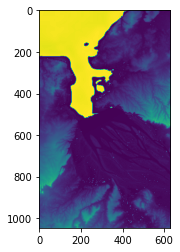

In [57]:
# Plot DEM map
# vmin = 0; cutoff at sea level (0 m)
# vmax = 120; cutoff at high values (120 m)
plot_image(dem_data[0])

In [58]:
evalscript = """
    //VERSION=3

    function setup() {
        return {
            input: [{
                bands: ["B02", "B03", "B04"],
                units: "DN"
            }],
            output: {
                bands: 3,
                sampleType: "INT16"
            }
        };
    }

    function updateOutputMetadata(scenes, inputMetadata, outputMetadata) {
        outputMetadata.userData = { "norm_factor":  inputMetadata.normalizationFactor }
    }

    function evaluatePixel(sample) {
        return [sample.B04, sample.B03, sample.B02];
    }
"""

request_multitype = SentinelHubRequest(
    evalscript=evalscript,
    input_data=[
        SentinelHubRequest.input_data(
            data_source=DataSource.SENTINEL2_L1C,
            time_interval=('2020-06-01', '2020-06-30'),
            mosaicking_order='leastCC'
        )
    ],
    responses=[
        SentinelHubRequest.output_response('default', MimeType.TIFF),
        SentinelHubRequest.output_response('userdata', MimeType.JSON)
    ],
    bbox=betsiboka_bbox,
    size=betsiboka_size,
    config=config
)

In [59]:
# print out information
multi_data = request_multitype.get_data()[0]
multi_data.keys()

dict_keys(['default.tif', 'userdata.json'])

In [60]:
# normalize image
img = multi_data['default.tif']
norm_factor = multi_data['userdata.json']['norm_factor']

img_float32 = img * norm_factor

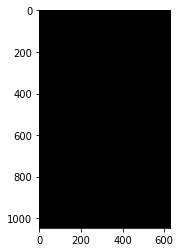

In [61]:
plot_image(img_float32)

In [62]:
request_raw_dict = {
    "input": {
        "bounds": {
            "properties": {
                "crs": betsiboka_bbox.crs.opengis_string
            },
            "bbox": list(betsiboka_bbox)
        },
        "data": [
            {
                "type": "S2L1C",
                "dataFilter": {
                    "timeRange": {"from": '2020-06-01T00:00:00Z', "to": '2020-06-30T00:00:00Z'},
                    "mosaickingOrder": "leastCC",
                }
            }
        ]
    },
    "output": {
        "width": betsiboka_size[0],
        "height": betsiboka_size[1],
        "responses": [
            {
                "identifier": "default",
                "format": {
                    'type': MimeType.TIFF.get_string()
                }
            }
        ]
    },
    "evalscript": evalscript_true_color
}

In [63]:
# create request
download_request = DownloadRequest(
    request_type='POST',
    url="https://services.sentinel-hub.com/api/v1/process",
    post_values=request_raw_dict,
    data_type=MimeType.TIFF,
    headers={'content-type': 'application/json'},
    use_session=True
)

# execute request
client = SentinelHubDownloadClient(config=config)
img = client.download(download_request)

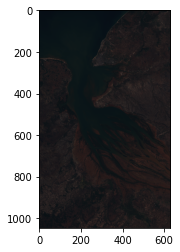

In [64]:
plot_image(img)

In [65]:
start = datetime.datetime(2019,1,1)
end = datetime.datetime(2019,12,31)
n_chunks = 13
tdelta = (end - start) / n_chunks
edges = [(start + i*tdelta).date().isoformat() for i in range(n_chunks)]
slots = [(edges[i], edges[i+1]) for i in range(len(edges)-1)]

print('Monthly time windows:\n')
for slot in slots:
    print(slot)

Monthly time windows:

('2019-01-01', '2019-01-29')
('2019-01-29', '2019-02-26')
('2019-02-26', '2019-03-26')
('2019-03-26', '2019-04-23')
('2019-04-23', '2019-05-21')
('2019-05-21', '2019-06-18')
('2019-06-18', '2019-07-16')
('2019-07-16', '2019-08-13')
('2019-08-13', '2019-09-10')
('2019-09-10', '2019-10-08')
('2019-10-08', '2019-11-05')
('2019-11-05', '2019-12-03')


In [66]:
def get_true_color_request(time_interval):
    return SentinelHubRequest(
        evalscript=evalscript_true_color,
        input_data=[
            SentinelHubRequest.input_data(
                data_source=DataSource.SENTINEL2_L1C,
                time_interval=time_interval,
                mosaicking_order='leastCC'
            )
        ],
        responses=[
            SentinelHubRequest.output_response('default', MimeType.PNG)
        ],
        bbox=betsiboka_bbox,
        size=betsiboka_size,
        config=config
    )

In [67]:
# create a list of requests
list_of_requests = [get_true_color_request(slot) for slot in slots]
list_of_requests = [request.download_list[0] for request in list_of_requests]

# download data with multiple threads
data = SentinelHubDownloadClient(config=config).download(list_of_requests, max_threads=5)

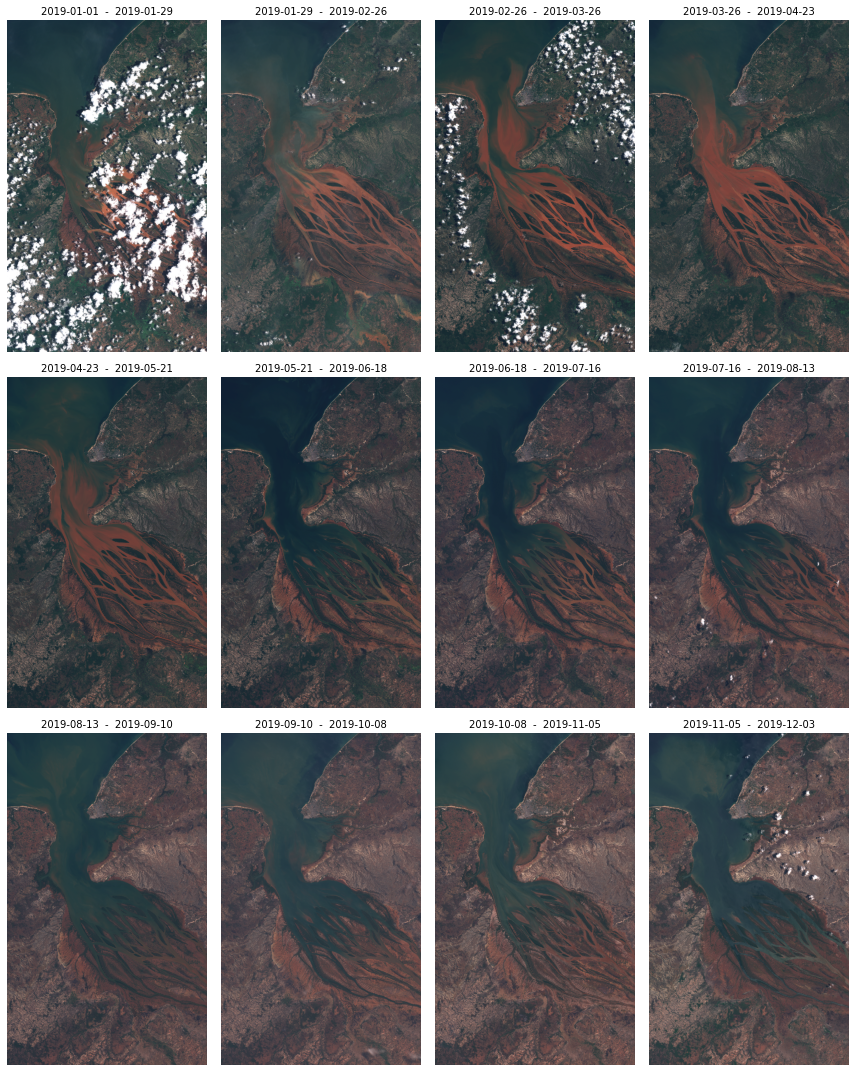

In [68]:
# some stuff for pretty plots
ncols = 4
nrows = 3
aspect_ratio = betsiboka_size[0] / betsiboka_size[1]
subplot_kw = {'xticks': [], 'yticks': [], 'frame_on': False}

fig, axs = plt.subplots(ncols=ncols, nrows=nrows, figsize=(5 * ncols * aspect_ratio, 5 * nrows),
                        subplot_kw=subplot_kw)

for idx, image in enumerate(data):
    ax = axs[idx // ncols][idx % ncols]
    ax.imshow(np.clip(image * 2.5/255, 0, 1))
    ax.set_title(f'{slots[idx][0]}  -  {slots[idx][1]}', fontsize=10)

plt.tight_layout()

In [69]:
byoc_bbox = BBox([13.353882, 45.402307, 16.644287, 46.908998], crs=CRS.WGS84)
byoc_size = bbox_to_dimensions(byoc_bbox, resolution=240)
collection_id = '7453e962-0ee5-4f74-8227-89759fbe9ba9'


In [70]:
evalscript_byoc = '''
//VERSION=3
function setup() {
  return {
    input: ["lulc_reference"],
    output: { bands: 3 }
  };
}

var colorDict = {
  0: [255/255, 255/255, 255/255],
  1: [255/255, 255/255, 0/255],
  2: [5/255, 73/255, 7/255],
  3: [255/255, 165/255, 0/255],
  4: [128/255, 96/255, 0/255],
  5: [6/255, 154/255, 243/255],
  6: [149/255, 208/255, 252/255],
  7: [150/255, 123/255, 182/255],
  8: [220/255, 20/255, 60/255],
  9: [166/255, 166/255, 166/255],
  10: [0/255, 0/255, 0/255]
}

function evaluatePixel(sample) {
  return colorDict[sample.lulc_reference];
}
'''

In [71]:
byoc_request = SentinelHubRequest(
    evalscript=evalscript_byoc,
    input_data=[
        SentinelHubRequest.input_data(
            data_source=DataSource(collection_id)
        )],
    responses=[
        SentinelHubRequest.output_response('default', MimeType.TIFF)
    ],
    bbox=byoc_bbox,
    size=byoc_size,
    config=config
)

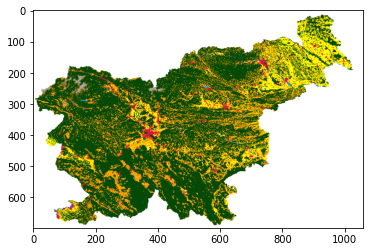

In [72]:
byoc_data = byoc_request.get_data()
plot_image(byoc_data[0])

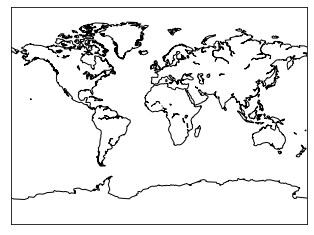

In [73]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

m = Basemap(projection='mill')
m.drawcoastlines()
plt.show()

In [78]:
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon as plt_polygon

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


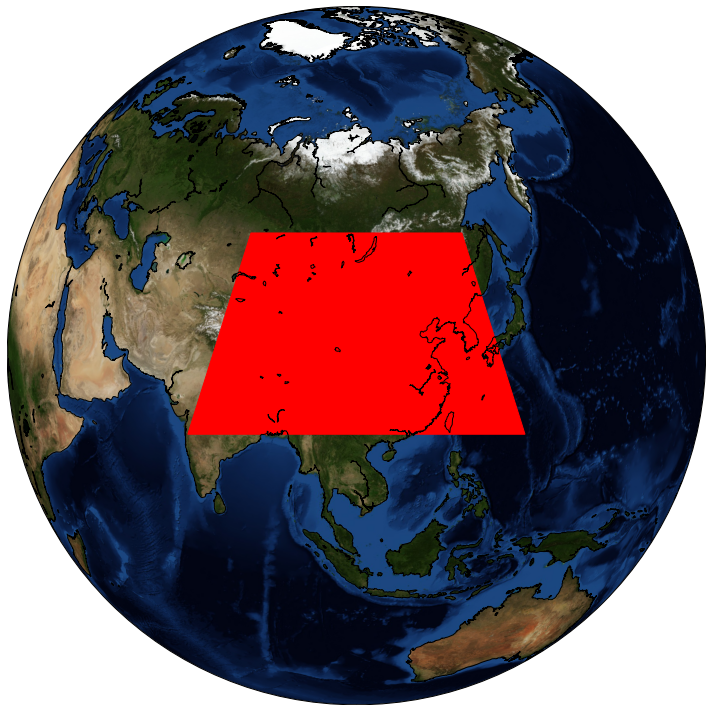

In [79]:
def show_area(area_shape, area_buffer=0.3):
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111)

    minx, miny, maxx, maxy = area_shape.bounds
    lng, lat = (minx + maxx) / 2, (miny + maxy) / 2

    m = Basemap(projection='ortho',lat_0=lat, lon_0=lng, resolution='l')
    m.drawcoastlines()
    m.bluemarble()

    if isinstance(area_shape, Polygon):
        area_shape = [area_shape]
    for polygon in area_shape:
        x, y = np.array(polygon.boundary)[0]
        m_poly = []
        for x, y in np.array(polygon.boundary):
            m_poly.append(m(x, y))
        ax.add_patch(plt_polygon(np.array(m_poly), closed=True, facecolor='red', edgecolor='red'))

    plt.tight_layout()
    plt.show()

show_area(polygon)

In [82]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import itertools

import numpy as np
from shapely.geometry import shape, Polygon, MultiPolygon, MultiLineString

from sentinelhub import BBoxSplitter, OsmSplitter, TileSplitter, CustomGridSplitter, UtmZoneSplitter, UtmGridSplitter
from sentinelhub import BBox, read_data, CRS, DataSource

In [83]:
bbox_splitter = BBoxSplitter([polygon], CRS.WGS84, (5, 4))  # bounding box will be split into grid of 5x4 bounding boxes

print('Area bounding box: {}\n'.format(bbox_splitter.get_area_bbox().__repr__()))

bbox_list = bbox_splitter.get_bbox_list()
info_list = bbox_splitter.get_info_list()

print('Each bounding box also has some info how it was created.\nExample:\n'
      'bbox: {}\ninfo: {}\n'.format(bbox_list[0].__repr__(), info_list[0]))

Area bounding box: BBox(((73.48, 18.35), (134.63, 53.59)), crs=CRS('4326'))

Each bounding box also has some info how it was created.
Example:
bbox: BBox(((73.48, 18.35), (85.71000000000001, 27.160000000000004)), crs=CRS('4326'))
info: {'parent_bbox': BBox(((73.48, 18.35), (134.63, 53.59)), crs=CRS('4326')), 'index_x': 0, 'index_y': 0}



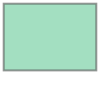

In [84]:
geometry_list = bbox_splitter.get_geometry_list()
geometry_list[0]

In [85]:
def show_splitter(splitter, alpha=0.2, area_buffer=0.2, show_legend=False):
    area_bbox = splitter.get_area_bbox()
    minx, miny, maxx, maxy = area_bbox
    lng, lat = area_bbox.middle
    w, h = maxx - minx, maxy - miny
    minx = minx - area_buffer * w
    miny = miny - area_buffer * h
    maxx = maxx + area_buffer * w
    maxy = maxy + area_buffer * h

    fig=plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111)

    base_map = Basemap(projection='mill', lat_0=lat, lon_0=lng, llcrnrlon=minx, llcrnrlat=miny,
                       urcrnrlon=maxx, urcrnrlat=maxy, resolution='l', epsg=4326)
    base_map.drawcoastlines(color=(0, 0, 0, 0))

    area_shape = splitter.get_area_shape()
    if isinstance(area_shape, Polygon):
        area_shape = [area_shape]
    for polygon in area_shape:
        if isinstance(polygon.boundary, MultiLineString):
            for linestring in polygon.boundary:
                ax.add_patch(plt_polygon(np.array(linestring), closed=True, facecolor=(0, 0, 0, 0), edgecolor='red'))
        else:
            ax.add_patch(plt_polygon(np.array(polygon.boundary), closed=True, facecolor=(0, 0, 0, 0), edgecolor='red'))

    bbox_list = splitter.get_bbox_list()
    info_list = splitter.get_info_list()

    cm = plt.get_cmap('jet', len(bbox_list))
    legend_shapes = []
    for i, (bbox, info) in enumerate(zip(bbox_list, info_list)):
        wgs84_bbox = bbox.transform(CRS.WGS84).get_polygon()

        tile_color = tuple(list(cm(i))[:3] + [alpha])
        ax.add_patch(plt_polygon(np.array(wgs84_bbox), closed=True, facecolor=tile_color, edgecolor='green'))

        if show_legend:
            legend_shapes.append(plt.Rectangle((0,0),1,1, fc=cm(i)))

    if show_legend:
        legend_names = []
        for info in info_list:
            legend_name = '{},{}'.format(info['index_x'], info['index_y'])

            for prop in ['grid_index', 'tile']:
                if prop in info:
                    legend_name = '{},{}'.format(info[prop], legend_name)

            legend_names.append(legend_name)

        plt.legend(legend_shapes, legend_names)
    plt.tight_layout()
    plt.show()

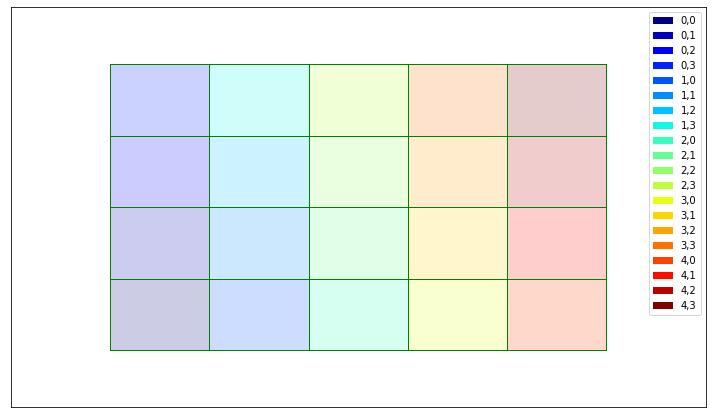

In [86]:
show_splitter(bbox_splitter, show_legend=True)

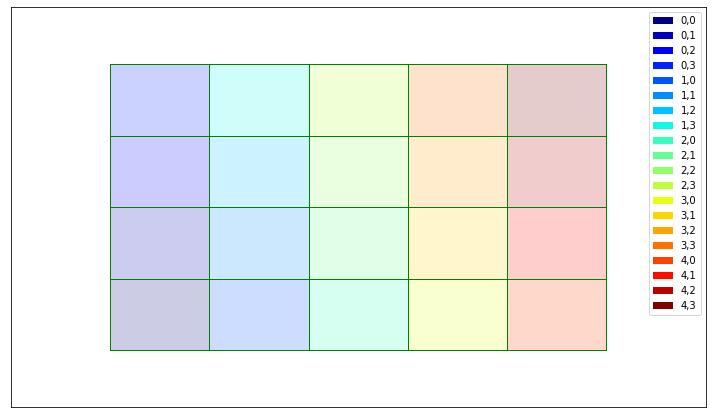

In [88]:
bbox_splitter_reduced = BBoxSplitter([polygon], CRS.WGS84, (5, 4), reduce_bbox_sizes=True)

show_splitter(bbox_splitter_reduced, show_legend=True)

In [89]:
osm_splitter = OsmSplitter([polygon], CRS.WGS84, zoom_level=10)

print(repr(osm_splitter.get_bbox_list()[0]))
print(osm_splitter.get_info_list()[0])

BBox(((73.47656249999999, 18.31281084642544), (73.82812499999999, 18.646245142670605)), crs=CRS('4326'))
{'zoom_level': 10, 'index_x': 721, 'index_y': 458}


In [91]:
#show_splitter(osm_splitter, show_legend=True)
#CAN BE TOO LARGE!

In [100]:
from sentinelhub import SHConfig

INSTANCE_ID = '2875debe-99af-4000-8a94-581300e3509d'  # In case you put instance ID into configuration file you can leave this unchanged

if INSTANCE_ID:
    config = SHConfig()
    config.instance_id = INSTANCE_ID
else:
    config = None

In [ ]:
tile_splitter = TileSplitter(
    [polygon],
    CRS.WGS84,
    ('2017-10-01', '2018-03-01'),
    data_source=DataSource.SENTINEL2_L1C,
    config=config
)

tile_bbox_list = tile_splitter.get_bbox_list()

print(len(tile_bbox_list))
print(tile_bbox_list[0].__repr__())
print(tile_splitter.get_info_list()[0])